# Cartopy Examples

https://scitools.org.uk/cartopy/docs/latest/gallery/

In [2]:
import cartopy
cartopy.__version__

'0.18.0'

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


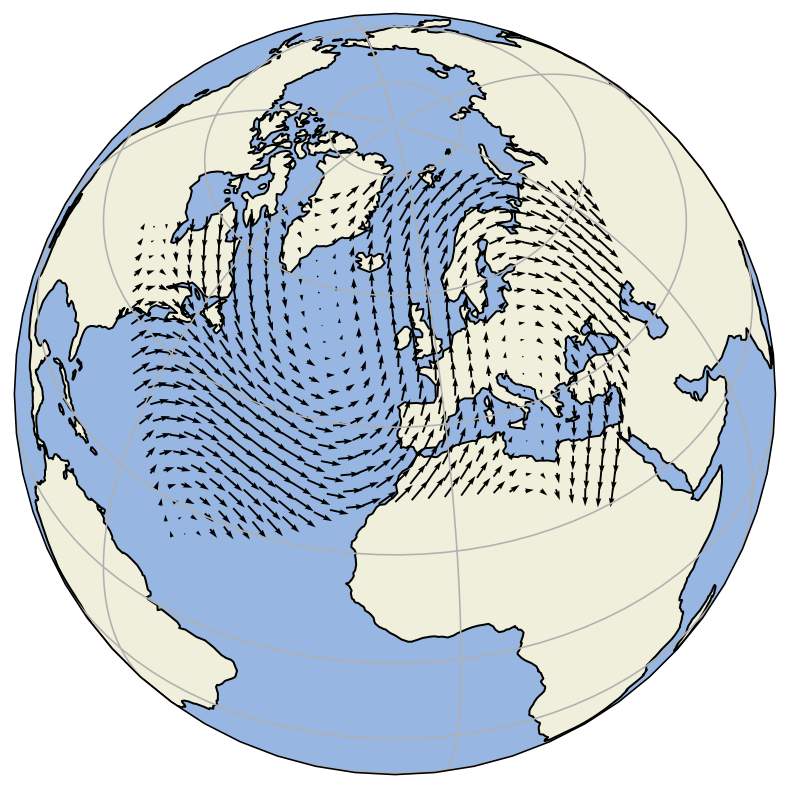

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def sample_data(shape=(20, 30)):
    """
    Return ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30))**2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))

ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()

x, y, u, v, vector_crs = sample_data()
ax.quiver(x, y, u, v, transform=vector_crs)

plt.show()

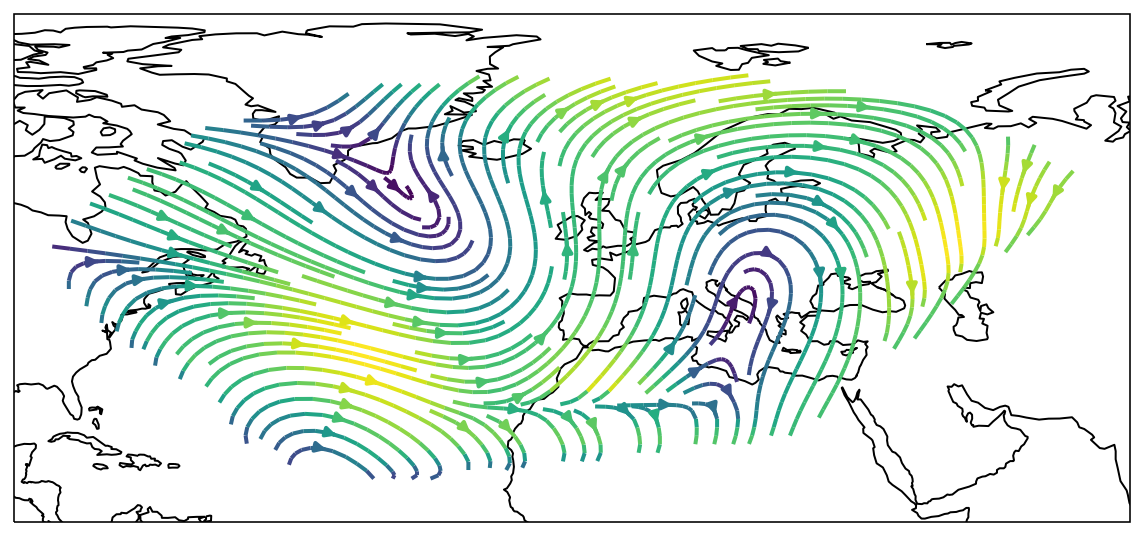

In [4]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-90, 75, 10, 85], crs=ccrs.PlateCarree())
ax.coastlines()

x, y, u, v, vector_crs = sample_data(shape=(80, 100))
magnitude = (u**2 + v**2)**0.5
ax.streamplot(x,
              y,
              u,
              v,
              transform=vector_crs,
              linewidth=2,
              density=2,
              color=magnitude)
plt.show()

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces_lakes_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


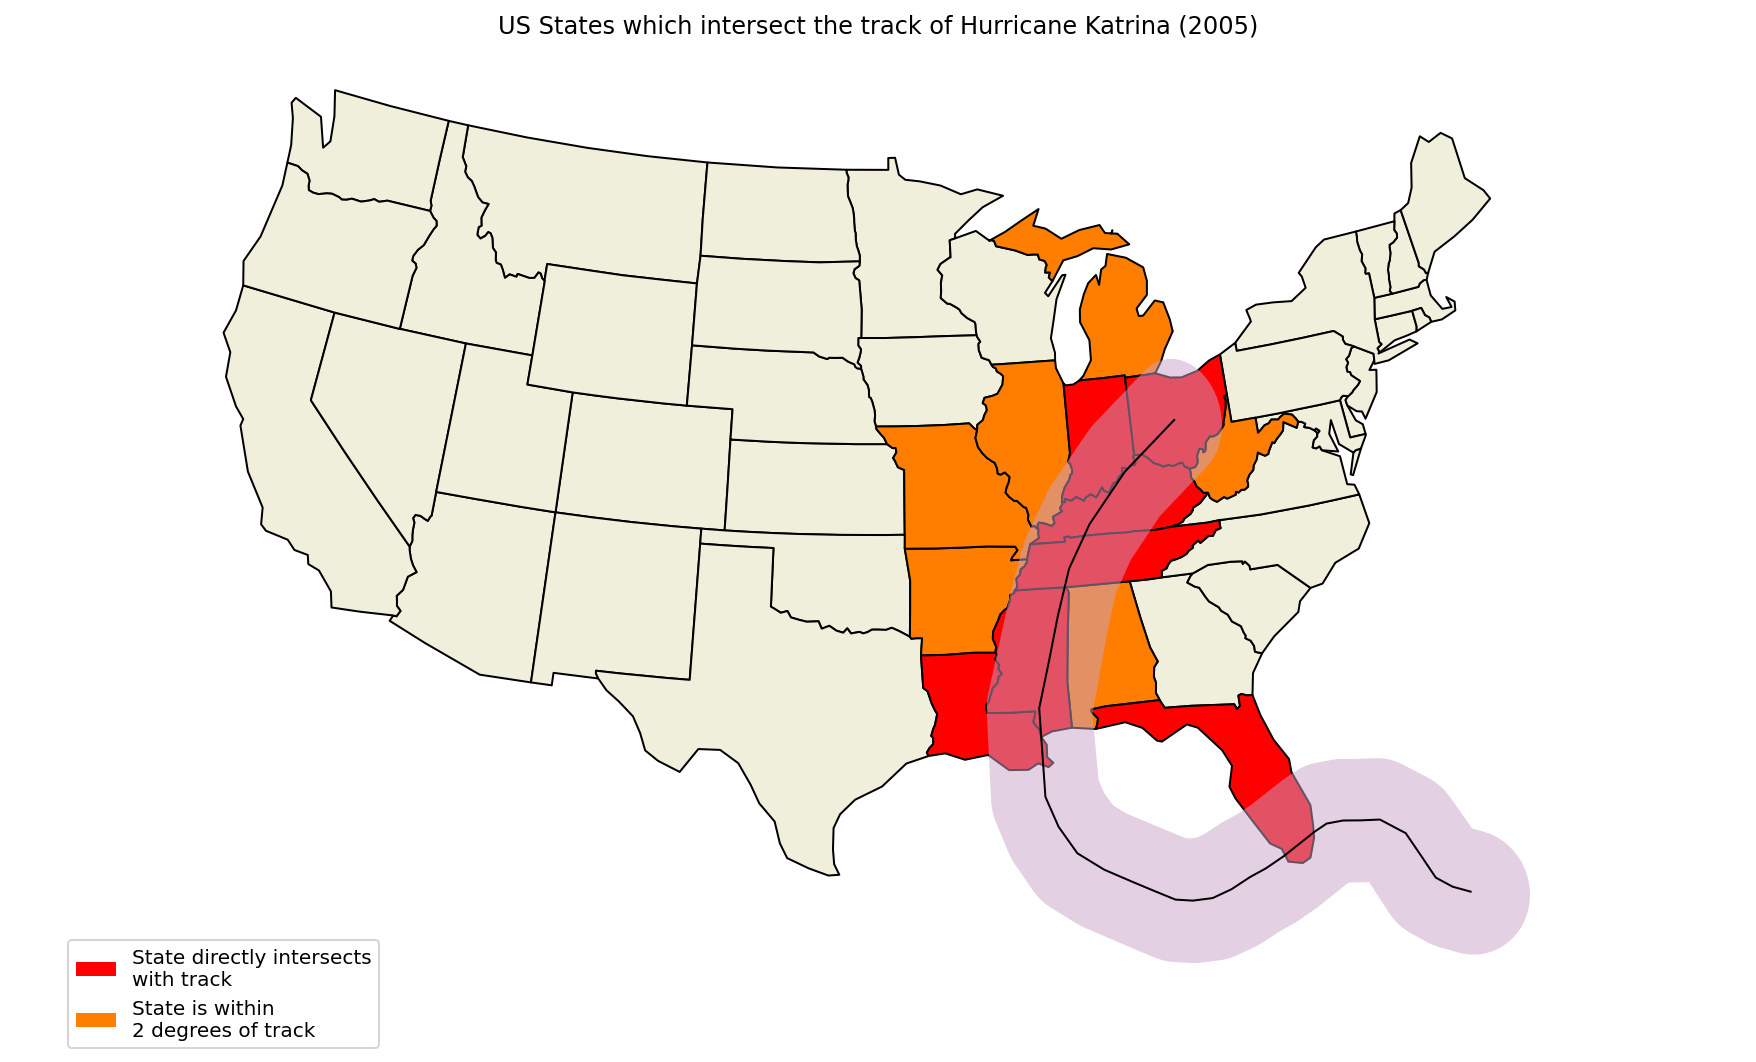

In [5]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    https://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [
        -75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0, -79.6, -80.1,
        -80.3, -81.3, -82.0, -82.6, -83.3, -84.0, -84.7, -85.3, -85.9, -86.7,
        -87.7, -88.6, -89.2, -89.6, -89.6, -89.6, -89.6, -89.6, -89.1, -88.6,
        -88.0, -87.0, -85.3, -82.9
    ]

    lats = [
        23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0, 25.9, 25.4,
        25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2, 25.7, 26.3, 27.2, 28.2,
        29.3, 29.5, 30.2, 31.1, 32.6, 34.1, 35.6, 37.0, 38.6, 40.1
    ]

    return lons, lats


fig = plt.figure()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1],
                  projection=ccrs.LambertConformal(),
                  frameon=False)
ax.patch.set_visible(False)

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural',
                                     name=shapename)

lons, lats = sample_data()

ax.set_title('US States which intersect the track of '
             'Hurricane Katrina (2005)')

# turn the lons and lats into a shapely LineString
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical
# distance)
track_buffer = track.buffer(2)


def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    if geometry.intersects(track):
        facecolor = 'red'
    elif geometry.intersects(track_buffer):
        facecolor = '#FF7E00'
    return {'facecolor': facecolor, 'edgecolor': 'black'}


ax.add_geometries(shpreader.Reader(states_shp).geometries(),
                  ccrs.PlateCarree(),
                  styler=colorize_state)

ax.add_geometries([track_buffer],
                  ccrs.PlateCarree(),
                  facecolor='#C8A2C8',
                  alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(), facecolor='none', edgecolor='k')

# make two proxy artists to add to a legend
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = [
    'State directly intersects\nwith track',
    'State is within \n2 degrees of track'
]
ax.legend([direct_hit, within_2_deg],
          labels,
          loc='lower left',
          bbox_to_anchor=(0.025, -0.1),
          fancybox=True)

plt.show()

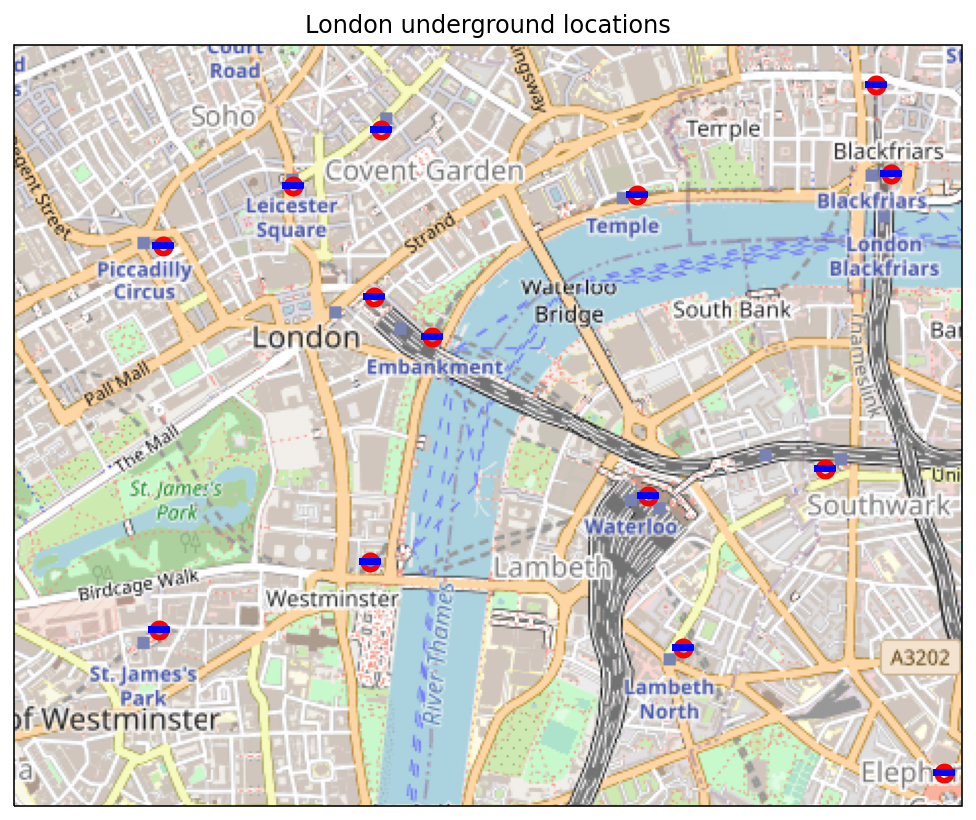

In [6]:
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM


def tube_locations():
    """
    Return an (n, 2) array of selected London Tube locations in Ordnance
    Survey GB coordinates.

    Source: https://www.doogal.co.uk/london_stations.php

    """
    return np.array([
        [531738., 180890.],
        [532379., 179734.],
        [531096., 181642.],
        [530234., 180492.],
        [531688., 181150.],
        [530242., 180982.],
        [531940., 179144.],
        [530406., 180380.],
        [529012., 180283.],
        [530553., 181488.],
        [531165., 179489.],
        [529987., 180812.],
        [532347., 180962.],
        [529102., 181227.],
        [529612., 180625.],
        [531566., 180025.],
        [529629., 179503.],
        [532105., 181261.],
        [530995., 180810.],
        [529774., 181354.],
        [528941., 179131.],
        [531050., 179933.],
        [530240., 179718.],
    ])


imagery = OSM()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=imagery.crs)
ax.set_extent([-0.14, -0.1, 51.495, 51.515], ccrs.PlateCarree())

# Construct concentric circles and a rectangle,
# suitable for a London Underground logo.
theta = np.linspace(0, 2 * np.pi, 100)
circle_verts = np.vstack([np.sin(theta), np.cos(theta)]).T
concentric_circle = Path.make_compound_path(Path(circle_verts[::-1]),
                                            Path(circle_verts * 0.6))

rectangle = Path([[-1.1, -0.2], [1, -0.2], [1, 0.3], [-1.1, 0.3]])

# Add the imagery to the map.
ax.add_image(imagery, 14)

# Plot the locations twice, first with the red concentric circles,
# then with the blue rectangle.
xs, ys = tube_locations().T
ax.plot(xs,
        ys,
        transform=ccrs.OSGB(approx=False),
        marker=concentric_circle,
        color='red',
        markersize=9,
        linestyle='')
ax.plot(xs,
        ys,
        transform=ccrs.OSGB(approx=False),
        marker=rectangle,
        color='blue',
        markersize=11,
        linestyle='')

ax.set_title('London underground locations')
plt.show()